混合ガウスモデルのEMアルゴリズム実装

In [35]:
module GMM

using Distributions
using CairoMakie
using Random

import Base: rand
import Distributions: pdf
import CairoMakie: plot


"""
Model{T <: Union{Normal, MvNormal},D,K}

T::Distribution
D::Dimension
K::Components
"""
struct Model{T <: Union{Normal,MvNormal}, D, K}
    w::Vector{Float64}
    components::Vector{<:T}
end

function Model(w::AbstractVector, μs, Σs)
    @assert length(μs) > 0
    @assert length(Σs) > 0
    @assert length(w) > 0
    @assert length(w) == length(μs) == length(Σs)
    
    ds = [MvNormal(μ, Σ) for (μ, Σ) in zip(μs, Σs)]

    T = typeof(ds[1])
    D = length(μs[1])
    K = length(w)
    Model{T,D,K}(w, ds)
end


# 混合ガウスモデルのToyモデル
function example()
    π = [0.45, 0.25, 0.3] # 混合率
    # 平均ベクトル
    μs = [[5.0, 35.0], [-20.0, -10.], [30., -20.]] 
    # 共分散行列
    Σs = [[250.0 65.0; 65.0 270.0],
        [125.0 -45.0; -45.0 175.0],
        [125.0 -45.0; -45.0 175.0]] 

    return Model(π, μs, Σs)
end


"""
GaussianMixtureモデルのpdfの値を取得

xs: 入力ベクトル列[(x1,x2), ...]
"""
function pdf(m::Model{D,K}, xs::AbstractVector) where {D,K}
    y = zeros(length(xs))
    for component in m.components
        y .+= pdf.(Ref(component), xs)
    end
    y
end

"""
ランダムサンプリング
"""
function rand(m::Model{D,K}, n::Integer) where {D,K}
    xs = zeros(Float64, K, n)
    cat = Categorical(m.w)
    groups = rand(cat, n)
    for i in 1:length(m.components)
        idxs = findall(x -> x == i, groups)
        d = m.components[i]
        xs[:,idxs] = rand(MvNormal(d.μ, d.Σ), length(idxs))
    end
    xs
end


"""
モデルプロット
"""
function plot(model::Model{D,K}) where {D, K}
    # TODO
    μs = [d.μ for d in model.components]
    Σs = [d.Σ for d in model.components]

    # x-y平面の範囲を生成
    x1_rng = begin
        st = minimum(μ[1] for μ in μs) - 3*sqrt(Σs[1][1,1])
        en = maximum(μ[1] for μ in μs) + 3*sqrt(Σs[1][1,1])
        LinRange(st, en, 300)
    end
    x2_rng = begin
        st = minimum(μ[2] for μ in μs) - 3*sqrt(Σs[2][2,2])
        en = maximum(μ[2] for μ in μs) + 3*sqrt(Σs[2][2,2])
        LinRange(st, en, 300)
    end
    # グリッドを生成
    grid = collect.(Iterators.product(x1_rng, x2_rng)) |> vec;

    # 関数値を取得

    f = Figure()
    Axis(f[1, 1])
    y = pdf(model, grid)
    contour!(x1_rng, x2_rng, reshape(y, length(x1_rng), length(x2_rng)))

    f
end

end # module

Main.GMM

In [84]:
using CairoMakie
using Distributions
using .GMM

function generate_dataset(model::GMM.Model{T,D,K}, n::Integer) where {T,D,K}
    Xs = zeros(D, n)
    ys = rand(Categorical(model.w), n)
    for (i, d) in enumerate(model.components)
        idxs = findall(ys .== i)
        Xs[:, idxs] .= rand(d, length(idxs))
    end
    
    return Xs, ys
end

generate_dataset (generic function with 5 methods)

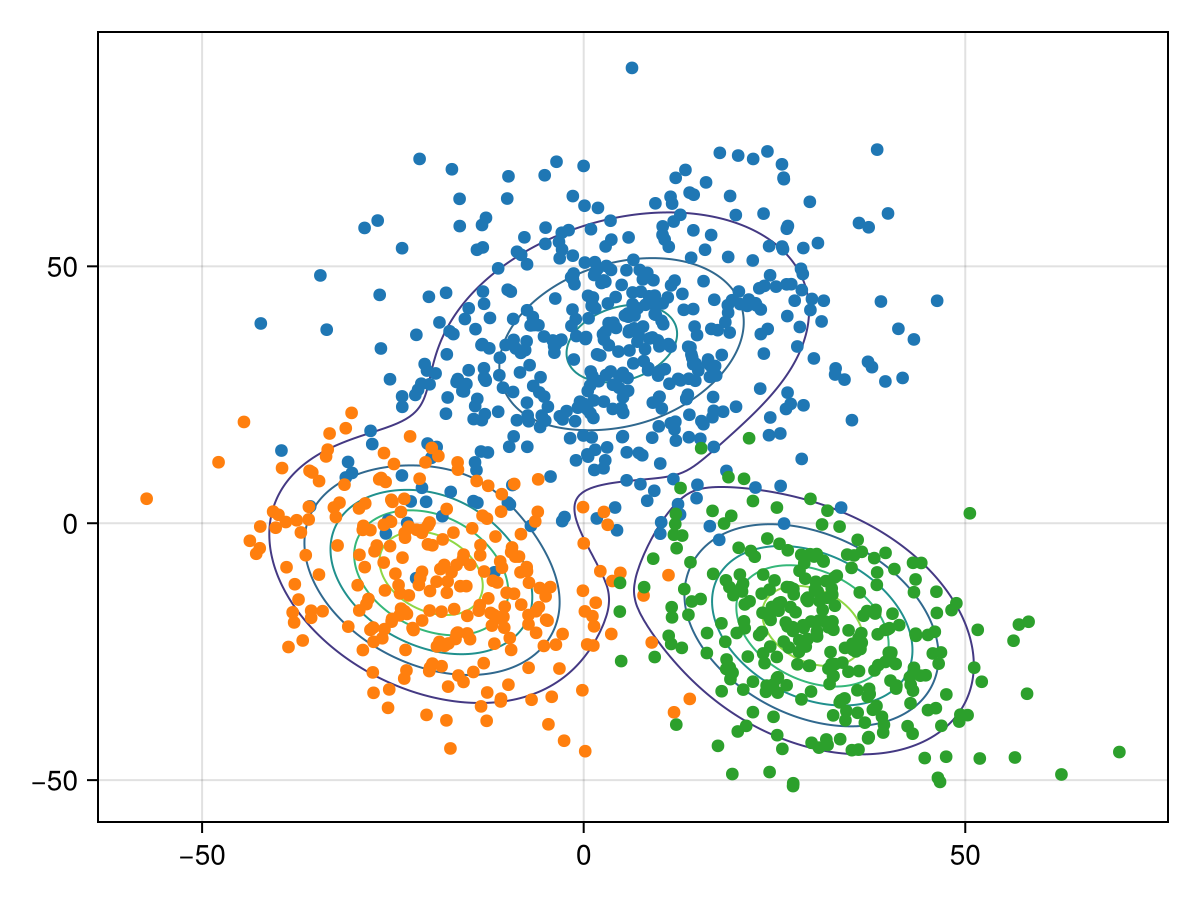

In [85]:

model = GMM.example()
Xs, ys = generate_dataset(model, 1000)

f = GMM.plot(model)

for (i,d) in enumerate(model.components)
    idxs = findall(ys .== i)
    scatter!(Xs[1,idxs], Xs[2,idxs], color=i, colormap=:tab10, colorrange=(1,10))
end
f


In [1]:
module EM


"""
    em_algorithm()
ガウス混合モデルにおけるEMアルゴリズムによるクラスタリング

γ: responsibility Matrix K x N

"""
function fit(::EMAlgorithm, xs, n_components, seed = 123) where T
    @assert length(xs) > 0

    Random.seed!(seed)
    N = size(xs,2)
    M = length(xs[1])

    μs, Σs, π = GMM.init(n_components)
    θ = (
        γ = zeros(n_components, N)
        w = zeros(n_components)
        μ = zeros(M, N)
        Σ = zeros(M, N, N)
    )

    fit!()
end

function fit!()



end


# E-step
function estep(max_iter)
    for i := 1:max_iter

        

        # 停止条件
        d_ln_p < threshold && break
    end

end

# M-step
function mstep(ratio)
    
    # update μ
    for k in 1:K # components
        μs[k] = sum(xs[n] * γ[k,n] for n in 1:length(xs))
        μs[k] .= 1 / ratio * sum(γ[n,k] * x for (n, x) in enumerate(eachcol(x)))

        Σs[k] = sum(
            (xs[n] - μs[k])*(xs[n] - μs[k])' for n in 1:length(xs)
        )

        r[k] = r / length(xs)
    end
    return
end

end # module

Base.Meta.ParseError: ParseError:
# Error @ /Users/kizawamasakazu/projects/bayes/models/GMM/em.ipynb:21:9
        γ = zeros(n_components, N)
        w = zeros(n_components)
#       └────────────────────┘ ── Expected `)`